In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
similarity_df = pd.read_csv('../../Data/Urtecho_LaFleur_overlap.csv')

In [17]:
from sklearn.preprocessing import MinMaxScaler

similarity_df['dG'] = MinMaxScaler().fit_transform(similarity_df['dG'].values.reshape(-1, 1))

In [24]:
similarity_df['expression_difference'] = abs(similarity_df['dG'] - similarity_df['norm_RNA_expression'])

In [27]:
similarity_df.to_csv('../../Data/Urtecho_LaFleur_overlap.csv', index=False)

In [33]:
def graph_bp_exp_similarity(similarity_df, sample_size=None):
    if sample_size:
        similarity_df = similarity_df.sample(n=sample_size)

    x = similarity_df['similarity']
    y = similarity_df['expression_difference']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    plt.scatter(x, y, label='Data points')
    plt.plot(x, regression_line, color='red', label=f'Linear regression\n$R^2={r_value**2:.2f}$\np-value={p_value:.2g}')
    plt.xlabel('Similarity')
    plt.ylabel('Expression Difference')
    plt.title('Similarity vs. Expression Difference')
    plt.legend()
    plt.show()


In [29]:
def graph_outputs(similarity_df, sample_size=None):
    if sample_size:
        similarity_df = similarity_df.sample(n=sample_size)
    
    plt.scatter(similarity_df['dG'], similarity_df['norm_RNA_expression'], c=similarity_df['similarity'], cmap='viridis')
    plt.xlabel('dG')
    plt.ylabel('Normalized RNA Expression')
    plt.title('dG vs. Normalized RNA Expression')
    plt.colorbar(label='Similarity')
    plt.show()


/Users/tien/Documents/GitHub/promoter-sequence-transcription-rates/Synth_CURE_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


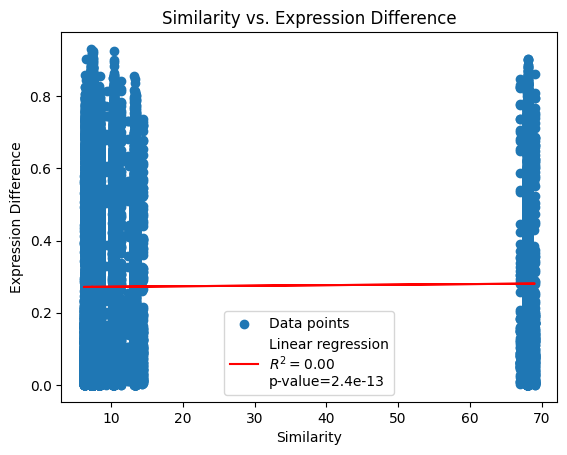

In [34]:
graph_bp_exp_similarity(similarity_df, 1000000)

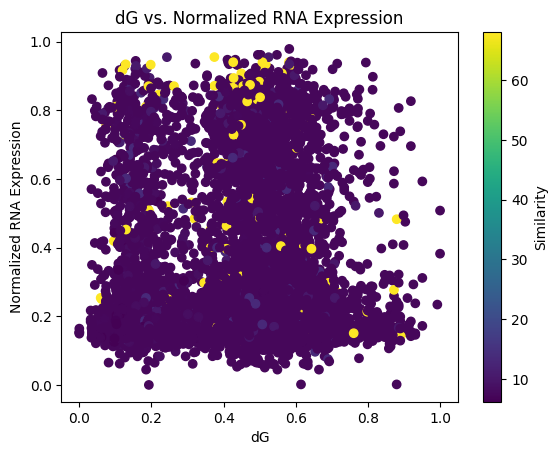

In [31]:
graph_outputs(similarity_df, 10000)